In [2]:
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
with open('mapper.pkl', 'rb') as open_file:
    mapper = pkl.load(open_file)

In [4]:
with open('GBmapper.pkl', 'rb') as open_file:
    GBmapper = pkl.load(open_file)

In [1]:
with open('monday_best_estimator.pkl', 'rb') as open_file:
    GBoost_est = pkl.load(open_file)

NameError: name 'pkl' is not defined

Open observations to extract test set for plotting

In [6]:
with open('observations.pkl', 'rb') as open_file:
    df = pkl.load(open_file)

In [7]:
X = mapper.fit_transform(df)

/home/dlahtou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dlahtou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dlahtou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dlahtou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
X_gboost = GBmapper.fit_transform(df)

In [9]:
y = df['funded']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [11]:
X_gbtrain, X_gbtest, y_gbtrain, y_gbtest = train_test_split(X_gboost, y, random_state=10)

Prepare ROC data for plotting

In [12]:
GBoost_pred_proba = GBoost_est.predict_proba(X_gbtest)
fpr_grd, tpr_grd, _ = roc_curve(y_test, GBoost_pred_proba[:,1])

In [13]:
with open('SVM_best_estimator.pkl', 'rb') as open_file:
    SVM_est = pkl.load(open_file)
y_pred_proba = SVM_est.predict_proba(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba[:,1])

In [14]:
with open('RF_best_estimator.pkl', 'rb') as open_file:
    RF_est = pkl.load(open_file)
y_pred_proba = RF_est.predict_proba(X_gbtest)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba[:,1])

In [15]:
with open('RF_best_SMOTE_estimator.pkl', 'rb') as open_file:
    RF_SMOTE_est = pkl.load(open_file)
y_pred_proba = RF_SMOTE_est.predict_proba(X_gbtest)
fpr_rfs, tpr_rfs, _ = roc_curve(y_test, y_pred_proba[:,1])

In [16]:
with open('KNN_best_estimator.pkl', 'rb') as open_file:
    KNN_est = pkl.load(open_file)
y_pred_proba = KNN_est.predict_proba(X_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba[:,1])

In [17]:
with open('LR_best_estimator.pkl', 'rb') as open_file:
    LR_est = pkl.load(open_file)
y_pred_proba = LR_est.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba[:,1])

In [19]:
fpr_stupid, tpr_stupid, _ = roc_curve(y_test, [1 for y in y_test])

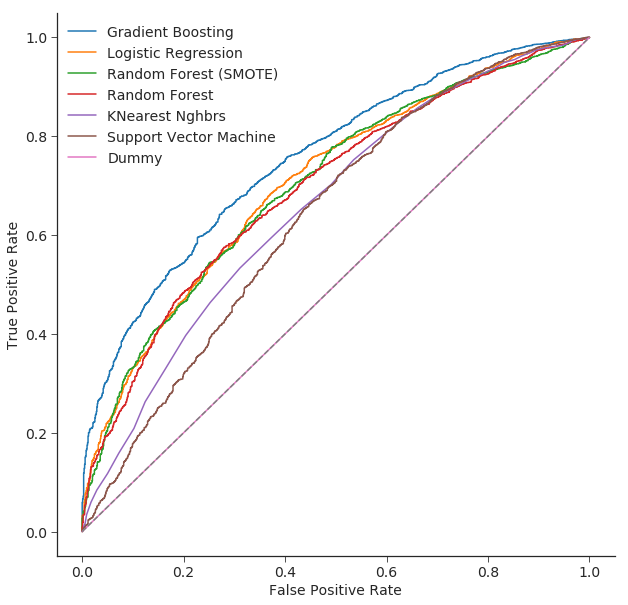

In [155]:
plt.figure(figsize=[10,10])
plt.plot(fpr_grd, tpr_grd, label='Gradient Boosting')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rfs, tpr_rfs, label='Random Forest (SMOTE)')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_knn, tpr_knn, label='KNearest Nghbrs')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine')
plt.plot(fpr_stupid, tpr_stupid, label='Dummy')
plt.plot([0,1], [0,1], linestyle='dashed')
plt.legend(loc='upper right', bbox_to_anchor=[0.42,1], fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

In [26]:
roc_auc_score(y_test, GBoost_pred_proba[:,1])

0.7539745868968745

In [52]:
with open('ORobservations.pkl', 'rb') as open_file:
    ORdf = pkl.load(open_file)

ORX_gboost = GBmapper.fit_transform(ORdf)
ORy = ORdf['funded']

In [53]:
ORGBoost_pred_proba = GBoost_est.predict_proba(ORX_gboost)
fpr_orgrd, tpr_orgrd, _ = roc_curve(ORy, ORGBoost_pred_proba[:,1])
roc_auc_score(ORy, ORGBoost_pred_proba[:,1])

0.7374265252898531

In [54]:
GBoost_pred_proba = GBoost_est.predict_proba(X_gbtrain)
fpr_grdtrain, tpr_grdtrain, _ = roc_curve(y_train, GBoost_pred_proba[:,1])

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ORy, GBoost_est.predict(ORX_gboost))

array([[  256,  2159],
       [  245, 10169]])

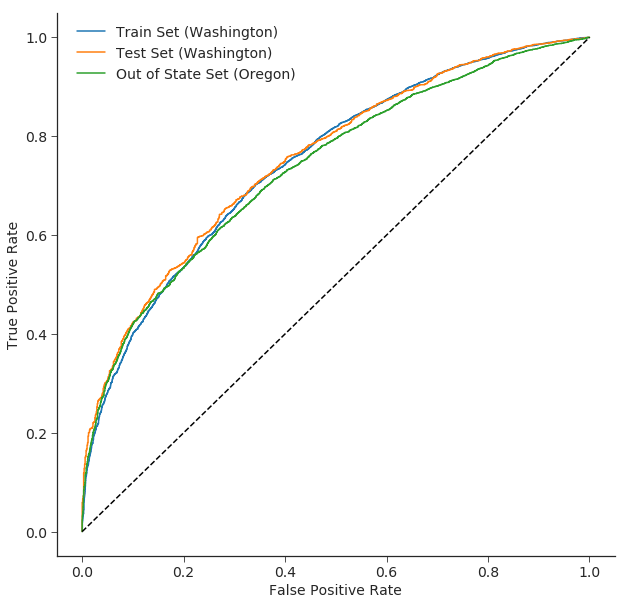

In [61]:
plt.figure(figsize=[10,10])
plt.plot(fpr_grdtrain, tpr_grdtrain, label='Train Set (Washington)')
plt.plot(fpr_grd, tpr_grd, label='Test Set (Washington)')
plt.plot(fpr_orgrd, tpr_orgrd, label='Out of State Set (Oregon)')
plt.plot([0,1], [0,1], linestyle='dashed', color='black')
plt.legend(loc='upper right', bbox_to_anchor=[0.45,1], fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

<h2>Appendix Charts</h2>

In [62]:
import numpy as np

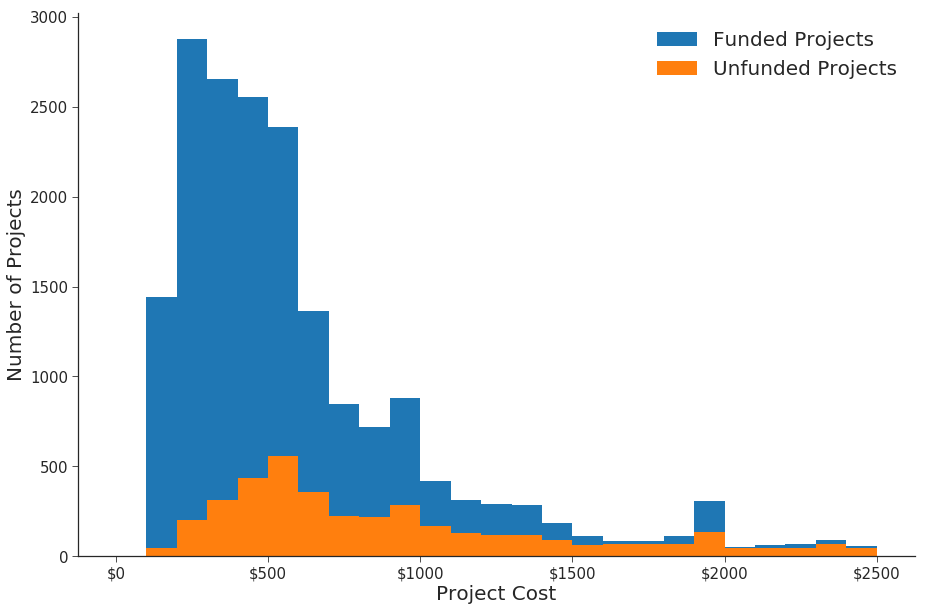

In [86]:
locs=[500*x for x in range(6)]
plt.figure(figsize=[15,10])
#plt.hist(df['project_cost'], bins=np.linspace(0,2500,26))
plt.hist(funded, bins=np.linspace(0,2500,26), label="Funded Projects")
plt.hist(unfunded, bins=np.linspace(0,2500,26), label="Unfunded Projects")
plt.ylabel('Number of Projects', fontsize=20)
plt.xlabel('Project Cost', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(locs, ['$'+str(x) for x in locs], fontsize=15)
plt.legend(loc='upper right', fontsize=20)
sns.despine()

([<matplotlib.axis.XTick at 0x7fc63bb80048>,
 <a list of 6 Text xticklabel objects>)

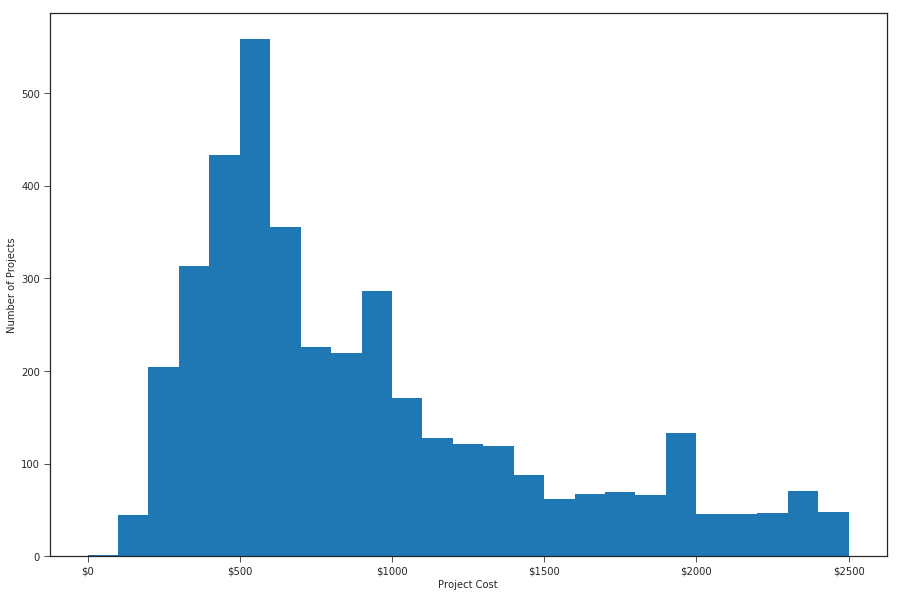

In [68]:
plt.figure(figsize=[15,10])
plt.hist(funded, bins=np.linspace(0,2500,26))
plt.ylabel('Number of Projects')
plt.xlabel('Project Cost')
plt.xticks(locs, ['$'+str(x) for x in locs])

In [78]:
unfunded = df[df['funded'] == 0]['project_cost'].sort_values(ascending=False)

In [79]:
funded = df[df['funded'] == 1]['project_cost'].sort_values(ascending=False)

In [98]:
unfunded_items = df[df['funded'] == 0]['num_items'].sort_values(ascending=False).dropna()
funded_items = df[df['funded'] == 1]['num_items'].sort_values(ascending=False).dropna()

In [121]:
fiftyf = funded_items.value_counts().loc[:50]

In [122]:
fiftyu = unfunded_items.value_counts().loc[:50]

Text(0,0.5,'Unfunded:Funded Ratio')

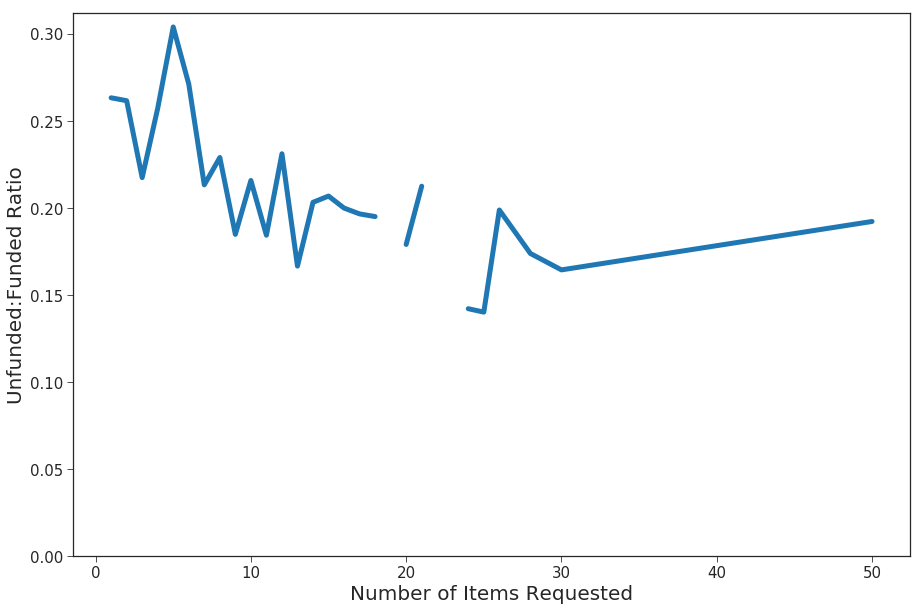

In [138]:
plt.figure(figsize=[15,10])
plt.plot(fiftyu/fiftyf, lw=5)
plt.xticks(fontsize=15)
plt.yticks([i*0.05 for i in range(7)], fontsize=15)
plt.xlabel("Number of Items Requested", fontsize=20)
plt.ylabel("Unfunded:Funded Ratio", fontsize=20)

In [129]:
funded_items.value_counts()[24]

218

In [130]:
unfunded_items.value_counts()[24]

31

In [139]:
unfunded_verbs = df[df['funded'] == 0]['essay_verb_density'].sort_values(ascending=False).dropna()
funded_verbs = df[df['funded'] == 1]['essay_verb_density'].sort_values(ascending=False).dropna()

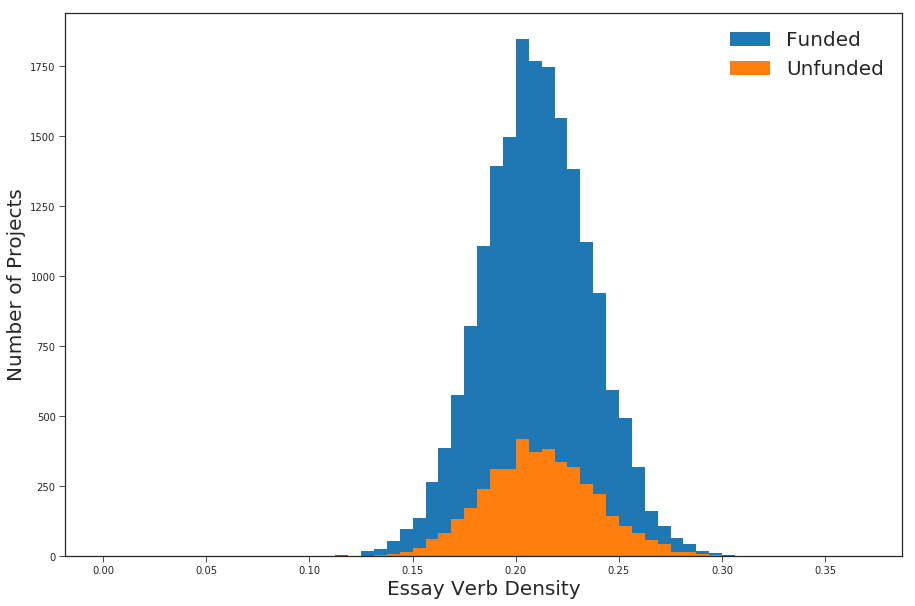

In [164]:
plt.figure(figsize=[15,10])
plt.hist(funded_verbs, label="Funded", bins=[i*.00625 for i in range(60)])
plt.hist(unfunded_verbs, label="Unfunded", bins=[i*.00625 for i in range(60)])
plt.xlabel("Essay Verb Density", fontsize=20)
plt.ylabel("Number of Projects", fontsize=20)
plt.legend(fontsize=20)

In [157]:
len(funded_items)

18229

In [158]:
len(unfunded_items)

4080

In [159]:
4080/18229

0.22381918920401558

In [165]:
unfunded_nouns = df[df['funded'] == 0]['essay_noun_density'].sort_values(ascending=False).dropna()
funded_nouns = df[df['funded'] == 1]['essay_noun_density'].sort_values(ascending=False).dropna()

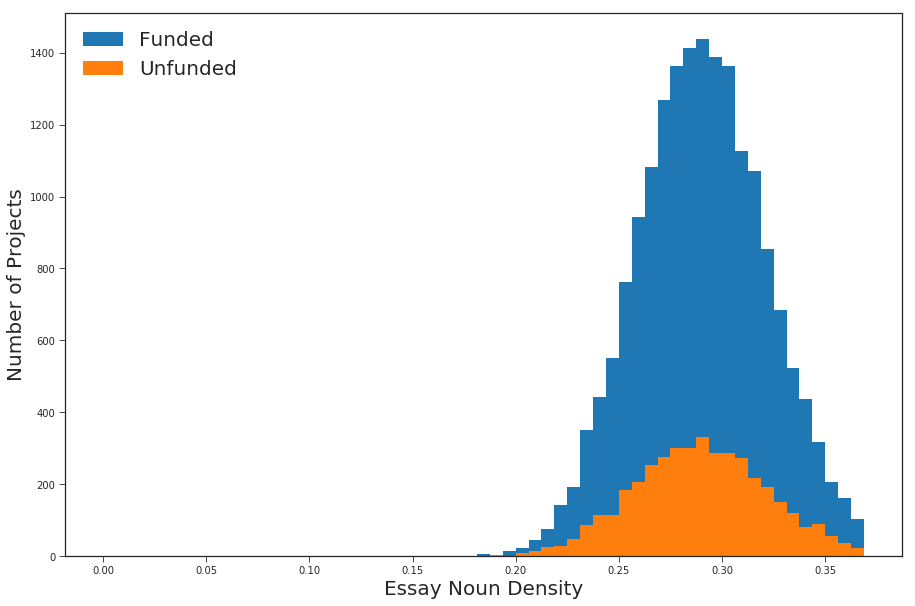

In [166]:
plt.figure(figsize=[15,10])
plt.hist(funded_nouns, label="Funded", bins=[i*.00625 for i in range(60)])
plt.hist(unfunded_nouns, label="Unfunded", bins=[i*.00625 for i in range(60)])
plt.xlabel("Essay Noun Density", fontsize=20)
plt.ylabel("Number of Projects", fontsize=20)
plt.legend(fontsize=20)

In [167]:
unfunded_length = df[df['funded'] == 0]['essay_length'].sort_values(ascending=False).dropna()
funded_length = df[df['funded'] == 1]['essay_length'].sort_values(ascending=False).dropna()

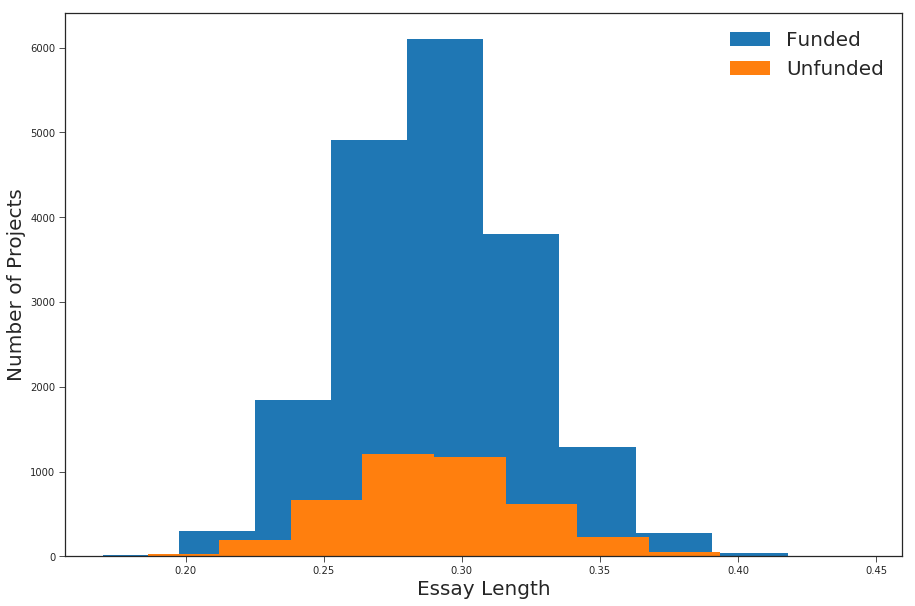

In [169]:
plt.figure(figsize=[15,10])
plt.hist(funded_nouns, label="Funded")
plt.hist(unfunded_nouns, label="Unfunded")
plt.xlabel("Essay Length", fontsize=20)
plt.ylabel("Number of Projects", fontsize=20)
plt.legend(fontsize=20)